# Compare comorbidities from Concomitant Meds and General Physical Exam

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pie.data_loader import DataLoader
from pie.data_preprocessor import DataPreprocessor

In [2]:
# First, load and clean the data and check we have Concomitant Meds and General Physical Exam
data = DataLoader.load("../PPMI")
cm_df = data[DataLoader.MEDICAL_HISTORY]["Concomitant_Medication"]
print(cm_df.shape)
pe_df = data[DataLoader.MEDICAL_HISTORY]["General_Physical_Exam"]
print(pe_df.shape)

2025-05-13 15:09:56 data_loader.py [INFO] Biospecimen modality requested. Exclusion list: []
2025-05-13 15:09:56 data_loader.py [INFO] Loading subject_characteristics data...
2025-05-13 15:09:56 data_loader.py [WARNING] Directory not found: ../PPMI/_Subject_Characteristics
2025-05-13 15:09:56 data_loader.py [INFO] Loading medical_history data...
2025-05-13 15:09:56 med_hist_loader.py [WARNING] No CSV file found for prefix: Adverse_Event
2025-05-13 15:09:56 med_hist_loader.py [WARNING] No CSV file found for prefix: AV-133_Prodromal
2025-05-13 15:09:56 med_hist_loader.py [WARNING] No CSV file found for prefix: C05-05_PET_Imaging_Substudy
2025-05-13 15:09:56 med_hist_loader.py [WARNING] No CSV file found for prefix: Clinical_Diagnosis
2025-05-13 15:09:56 med_hist_loader.py [WARNING] No CSV file found for prefix: Clinical_Global_Impression
2025-05-13 15:09:56 med_hist_loader.py [WARNING] No CSV file found for prefix: Determination_of_Freezing_and_Falls
2025-05-13 15:09:56 med_hist_loader.p

/Users/vic/Projects/MJFF/PIE/pie/med_hist_loader.py:142: DtypeWarning: Columns (6,7,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(csv_file)


2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Initiation_of_Dopaminergic_Therapy
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Medical_Conditions
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Neurological_Exam
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Other_Clinical_Features
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Participant_Global_Impression
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: PD_Diagnosis_History
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Pregnancy_Test
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Primary_Clincial_Diagnosis
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: Procedure_for_PD_Log
2025-05-13 15:09:57 med_hist_loader.py [WARNING] No CSV file found for prefix: 

In [3]:
# Build a table of which comorbidities each patient has ever had, according to meds
meds = cm_df.pivot_table(index="PATNO", columns="CMINDC_TEXT", values="CMINDC",
                         aggfunc=lambda v: 1, fill_value=0)
print(meds.shape)
meds.head()

(4422, 25)


CMINDC_TEXT,Anxiety,Atrial Fibrillation / Arrhythmias,Benign Prostatic Hypertrophy / Overactive Bladder,Cognitive Dysfunction,Congestive Heart Failure,Constipation,"Coronary Artery Disease, Peripheral Artery Disease, Stroke",Daytime Sleepiness,"Delusions, Hallucination, Psychosis",Depression,...,Nausea,Other,Pain,REM-Behavior Disorder,Restless Leg Syndrome,Sexual Dysfunction,Sialorrhea / Drooling,Supplements / Homeopathic Medication,Thyroid Disorder,Vitamins / Coenzymes
PATNO,,,,,,,,,,,,,,,,,,,,,
3000,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3001,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3002,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
3003,1,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
3004,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1


In [4]:
# Build a table of which comorbidities each patient has ever had, according to exam
phys = pe_df.pivot_table(index="PATNO", columns="PECAT", values="ABNORM", aggfunc="max", fill_value=0)
print(phys.shape)
phys.head()

(4871, 12)


PECAT,Abdomen,Cardiovascular (including peripheral vascular),Ears/Nose/Throat,Eyes,Head/Neck/Lymphatic,Lungs,Musculoskeletal,Neurological,Other,Other (Specify location and describe),Psychiatric,Skin
PATNO,,,,,,,,,,,,
3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
3001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0
3002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0
3004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0


In [5]:
# Merge both together, focusing on patients with both
merge = meds.merge(phys, how="inner", left_index=True, right_index=True)
print(merge.columns.tolist())
merge.head()

['Anxiety', 'Atrial Fibrillation / Arrhythmias', 'Benign Prostatic Hypertrophy / Overactive Bladder', 'Cognitive Dysfunction', 'Congestive Heart Failure', 'Constipation', 'Coronary Artery Disease, Peripheral Artery Disease, Stroke', 'Daytime Sleepiness', 'Delusions, Hallucination, Psychosis', 'Depression', 'Diabetes', 'GERD', 'Hyperlipidemia', 'Hypertension', 'Insomnia', 'Nausea', 'Other_x', 'Pain', 'REM-Behavior Disorder', 'Restless Leg Syndrome', 'Sexual Dysfunction', 'Sialorrhea / Drooling', 'Supplements / Homeopathic Medication', 'Thyroid Disorder', 'Vitamins / Coenzymes', 'Abdomen', 'Cardiovascular (including peripheral vascular)', 'Ears/Nose/Throat', 'Eyes', 'Head/Neck/Lymphatic', 'Lungs', 'Musculoskeletal', 'Neurological', 'Other_y', 'Other (Specify location and describe)', 'Psychiatric', 'Skin']


,Anxiety,Atrial Fibrillation / Arrhythmias,Benign Prostatic Hypertrophy / Overactive Bladder,Cognitive Dysfunction,Congestive Heart Failure,Constipation,"Coronary Artery Disease, Peripheral Artery Disease, Stroke",Daytime Sleepiness,"Delusions, Hallucination, Psychosis",Depression,...,Ears/Nose/Throat,Eyes,Head/Neck/Lymphatic,Lungs,Musculoskeletal,Neurological,Other_y,Other (Specify location and describe),Psychiatric,Skin
PATNO,,,,,,,,,,,,,,,,,,,,,
3000,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
3001,0,0,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0
3002,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3003,1,0,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0
3004,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0


In [6]:
# Let's compare "Psychiatric" on physical exam with "Depression" on meds
pd.crosstab(merge["Psychiatric"], merge["Depression"])

Depression,0,1
Psychiatric,,
0.0,3159,1070
0.5,23,4
1.0,42,72


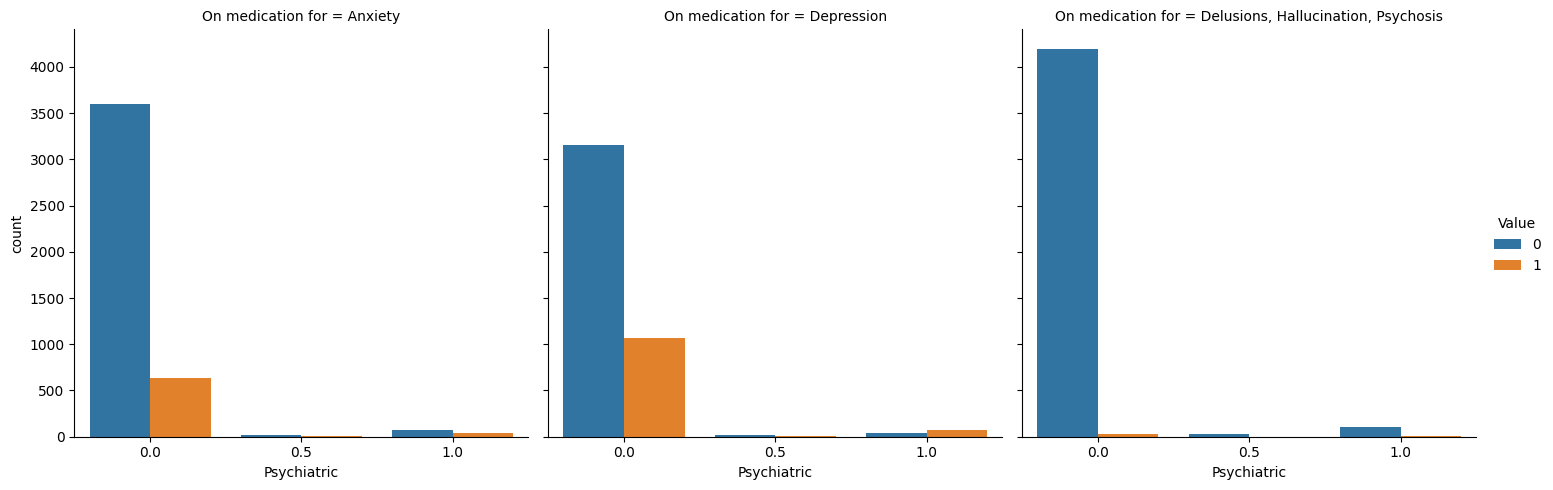

In [7]:
# Now let's visualize a few more medications, and whether patients were assessed
# as having a Psychiatric condition (No: 0, Yes: 1, Unable to assess: 0.5)
meds_of_interest = ["Anxiety", "Depression", "Delusions, Hallucination, Psychosis"]
tmp = merge.reset_index()[["PATNO", "Psychiatric"]+meds_of_interest].melt(
    id_vars=["PATNO", "Psychiatric"], var_name="On medication for", value_name="Value")
sns.catplot(data=tmp, col="On medication for", hue="Value", kind="count", x="Psychiatric")

We can see that many patients on medication for Anxiety and/or Depression were assessed as having no Psychiatric condition (orange columns at 0.0, left and centre plots). The only orange column larger than its partner blue column is in the centre plot, where those assessed as having a Psychiatric condition are more likely to be on medication for Depression than not on such medication.